In [1]:
import pandas as pd

df = pd.read_csv ('War_Posts.csv')
print(df)

       Unnamed: 0                                              title   postId  \
0               0          🇵🇸 📢 New Megathread Alert! 📢🇵🇸 - Nov 25th  183gtdq   
1               1  MODS: Please Create a Standardized "Propaganda...  17uj4co   
2               2  I am an American who lived in Palestine—our go...  185diib   
3               3  Released Israeli hostage writes a thank you le...  185frep   
4               4  Elon Musk meeting with Israeli President Herzo...  185ovce   
...           ...                                                ...      ...   
14276       14276  Ua pov Footage from the 93rd Mechanized Brigad...  17x3wzj   
14277       14277  RU POV: The arrival of FAB-500 across the Ukra...  17wnzzi   
14278       14278  UA POV: Ukrainian 5th Assult Brigade destroys ...  17wyss9   
14279       14279  Ua Pov: Two Shahed kamikaze drones being hit b...  17wsopp   
14280       14280  RU POV: Russian tank fires at treeline, gets h...  17woawb   

                     author

In [2]:
df.head()

,Unnamed: 0,title,postId,author,subreddit
0,0,🇵🇸 📢 New Megathread Alert! 📢🇵🇸 - Nov 25th,183gtdq,sabbah,Palestine
1,1,"MODS: Please Create a Standardized ""Propaganda...",17uj4co,Low_Butterscotch_320,Palestine
2,2,I am an American who lived in Palestine—our go...,185diib,TarquinOliverNimrod,Palestine
3,3,Released Israeli hostage writes a thank you le...,185frep,TerrorAreYou,Palestine
4,4,Elon Musk meeting with Israeli President Herzo...,185ovce,palestine771023,Palestine


In [6]:
df.title.count()

14281

In [12]:
import re
def cleanTxt(text):
 text = re.sub(r'@[A-Za-z0–9]+', '', text) #Remove @mentions replace with blank
 text = re.sub(r'#', '', text) #Remove the ‘#’ symbol, replace with blank
 text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
 text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
 text = re.sub(r':','', text) # Remove :
 return text
df['title']= df['title'].apply(cleanTxt)
df.head()

,Unnamed: 0,title,postId,author,subreddit
0,0,🇵🇸 📢 New Megathread Alert! 📢🇵🇸 - Nov 25th,183gtdq,sabbah,Palestine
1,1,"MODS Please Create a Standardized ""Propaganda ...",17uj4co,Low_Butterscotch_320,Palestine
2,2,I am an American who lived in Palestine—our go...,185diib,TarquinOliverNimrod,Palestine
3,3,Released Israeli hostage writes a thank you le...,185frep,TerrorAreYou,Palestine
4,4,Elon Musk meeting with Israeli President Herzo...,185ovce,palestine771023,Palestine


In [16]:
#Next we have to remove emoji & Unicode from the Tweet data.
def remove_emoji(string):
 emoji_pattern = re.compile("["
 u"\U0001F600-\U0001F64F" # emoticons
 u"\U0001F300-\U0001F5FF" # symbols & pictographs
 u"\U0001F680-\U0001F6FF" # transport & map symbols
 u"\U0001F1E0-\U0001F1FF" # flags (iOS)
 u"\U00002500-\U00002BEF" # chinese char
 u"\U00002702-\U000027B0"
 u"\U00002702-\U000027B0"
 u"\U000024C2-\U0001F251"
 u"\U0001f926-\U0001f937"
 u"\U000100000\U0010ffff"
 u"\u2640-\u2642"
 u"\u2600-\u2B55"
 u"\u200d"
 u"\u23cf"
 u"\u23e9"
 u"\u231a"
 u"\ufe0f" # dingbats
 u"\u3030"
 "]+", flags=re.UNICODE)
 return emoji_pattern.sub(r'', string)
#Cleaning the text
df['title']= df['title'].apply(remove_emoji)
#Show the clean text
df.head()

,Unnamed: 0,title,postId,author,subreddit
0,0,New Megathread Alert! - Nov 25th,183gtdq,sabbah,Palestine
1,1,"MODS Please Create a Standardized ""Propaganda ...",17uj4co,Low_Butterscotch_320,Palestine
2,2,I am an American who lived in Palestine—our go...,185diib,TarquinOliverNimrod,Palestine
3,3,Released Israeli hostage writes a thank you le...,185frep,TerrorAreYou,Palestine
4,4,Elon Musk meeting with Israeli President Herzo...,185ovce,palestine771023,Palestine


In [26]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [24]:
conda install -c conda-forge wordcloud=1.6.0 

Retrieving notices: ...working... DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/notices.json HTTP/1.1" 404 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/notices.json HTTP/1.1" 404 None
DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /conda-forge/notices.json HTTP/1.1" 404 None
done
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Startin

In [30]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

#Create a function to get the subjectivity
def getSubjectivity(text):
 return TextBlob(text).sentiment.subjectivity
#Create a function to get Polarity
def getPolarity(text):
 return TextBlob(text).sentiment.polarity
#Now we create a new column for what we just did and add it to the Tweet_df dataframe
df['Subjectivity'] = df['title'].apply(getSubjectivity)
df['Polarity'] = df['title'].apply(getPolarity)
#Now display data
df.head()

,Unnamed: 0,title,postId,author,subreddit,Subjectivity,Polarity
0,0,New Megathread Alert! - Nov 25th,183gtdq,sabbah,Palestine,0.454545,0.170455
1,1,"MODS Please Create a Standardized ""Propaganda ...",17uj4co,Low_Butterscotch_320,Palestine,0.100000,-0.100000
2,2,I am an American who lived in Palestine—our go...,185diib,TarquinOliverNimrod,Palestine,0.000000,0.000000
3,3,Released Israeli hostage writes a thank you le...,185frep,TerrorAreYou,Palestine,0.000000,0.000000
4,4,Elon Musk meeting with Israeli President Herzo...,185ovce,palestine771023,Palestine,0.000000,0.000000


In [29]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.8/222.8 kB 1.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.9.2-cp311-cp311-macosx_11_0_arm64.whl size=151325 sha256=519bf729c5bbdfcf9aa04f8c82b53d667a3549c24fb0f8f5a1df65a82a8525e7
  Stored in directory: /Users/selengetulga/Library/Caches/pip/wheels/3f/c6/5a/89824e1846baaa6d6d54b3a7b1e7deecc9ae6e7ed30a1c8b0e
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


In [33]:
#Group the range of Polarity into different categories
def getInsight(score):
 if score < 0:
     return 'Negative'
 elif score == 0:
     return 'Neutral'
 else:
     return 'Positive'
df['Insight'] = df['Polarity'].apply(getInsight)
df.head(50)

,Unnamed: 0,title,postId,author,subreddit,Subjectivity,Polarity,Insight
0,0,New Megathread Alert! - Nov 25th,183gtdq,sabbah,Palestine,0.454545,0.170455,Positive
1,1,"MODS Please Create a Standardized ""Propaganda ...",17uj4co,Low_Butterscotch_320,Palestine,0.100000,-0.100000,Negative
2,2,I am an American who lived in Palestine—our go...,185diib,TarquinOliverNimrod,Palestine,0.000000,0.000000,Neutral
3,3,Released Israeli hostage writes a thank you le...,185frep,TerrorAreYou,Palestine,0.000000,0.000000,Neutral
4,4,Elon Musk meeting with Israeli President Herzo...,185ovce,palestine771023,Palestine,0.000000,0.000000,Neutral
5,5,"""camera saves Palestinian from being convicted...",185by20,catguyalreadytaken,Palestine,0.000000,0.000000,Neutral
6,6,A video showing Israeli bulldozer destroying Y...,185m4z3,Enough_Limit_501,Palestine,0.000000,-0.200000,Negative
7,7,"Michigan's US Senate candidate, Nasser Beydoun...",185l8w4,justmo17,Palestine,0.000000,0.000000,Neutral
8,8,Zionist pundit makes a bold claim at the start...,185nw7o,iwasasin,Palestine,0.658333,0.341667,Positive
9,9,"First Palestinian rally, bought a few flags fo...",185copn,Inevitable-Shower-87,Palestine,0.411111,0.150000,Positive


In [35]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

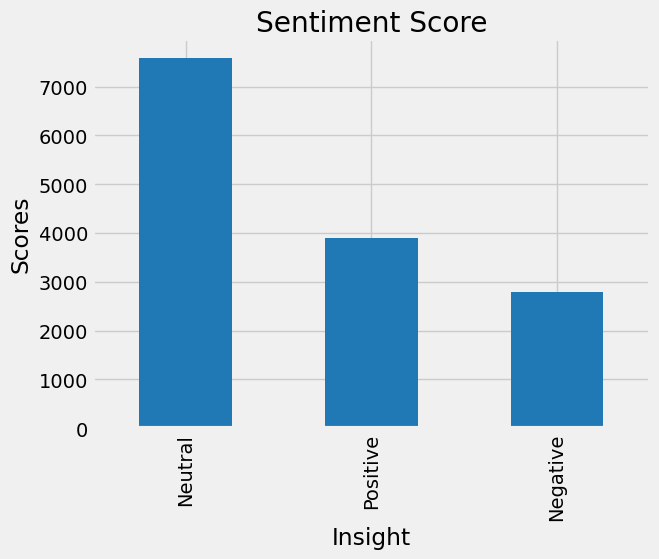

In [36]:
#Plot the values count of sentiment
plt.title('Sentiment Score')
plt.xlabel('Sentiment')
plt.ylabel('Scores')
plt.rcParams['figure.figsize'] = (10,8)
df['Insight'].value_counts().plot(kind='bar', color='#2078B4')
plt.show()

In [37]:
stopwords = STOPWORDS
print(stopwords)

{'what', "won't", "hadn't", 'does', 'through', 'otherwise', 'been', 'these', 'www', 'they', 'those', 'of', 'him', 'am', 'whom', 'could', 'myself', 'yours', 'not', 'other', 'her', 'theirs', 'is', 'over', 'was', "aren't", "what's", "she's", 'yourselves', "we're", "hasn't", 'and', 'above', 'why', 'both', 'should', "it's", 'each', 'such', 'some', "didn't", 'in', 'com', 'hence', 'any', 'too', 'below', 'having', 'while', 'his', 'as', 'until', 'would', 'being', 'ourselves', "i've", 'them', 'out', 'once', 'else', 'do', 'shall', 'same', 'me', "there's", "we've", 'also', 'yourself', "he'd", 'my', "here's", "weren't", 'after', 'i', 'under', "she'll", 'all', 'nor', "who's", 'or', 'themselves', "he's", 'has', 'very', "mustn't", "i'm", "he'll", "wasn't", "why's", 'itself', 'we', 'into', "isn't", 'r', 'about', "let's", 'you', 'so', 'ought', "you'd", 'because', "how's", 'get', 'your', "haven't", 'herself', 'this', 'by', 'if', 'it', 'more', 'on', 'ours', "you're", 'cannot', 'between', 'against', 'down'

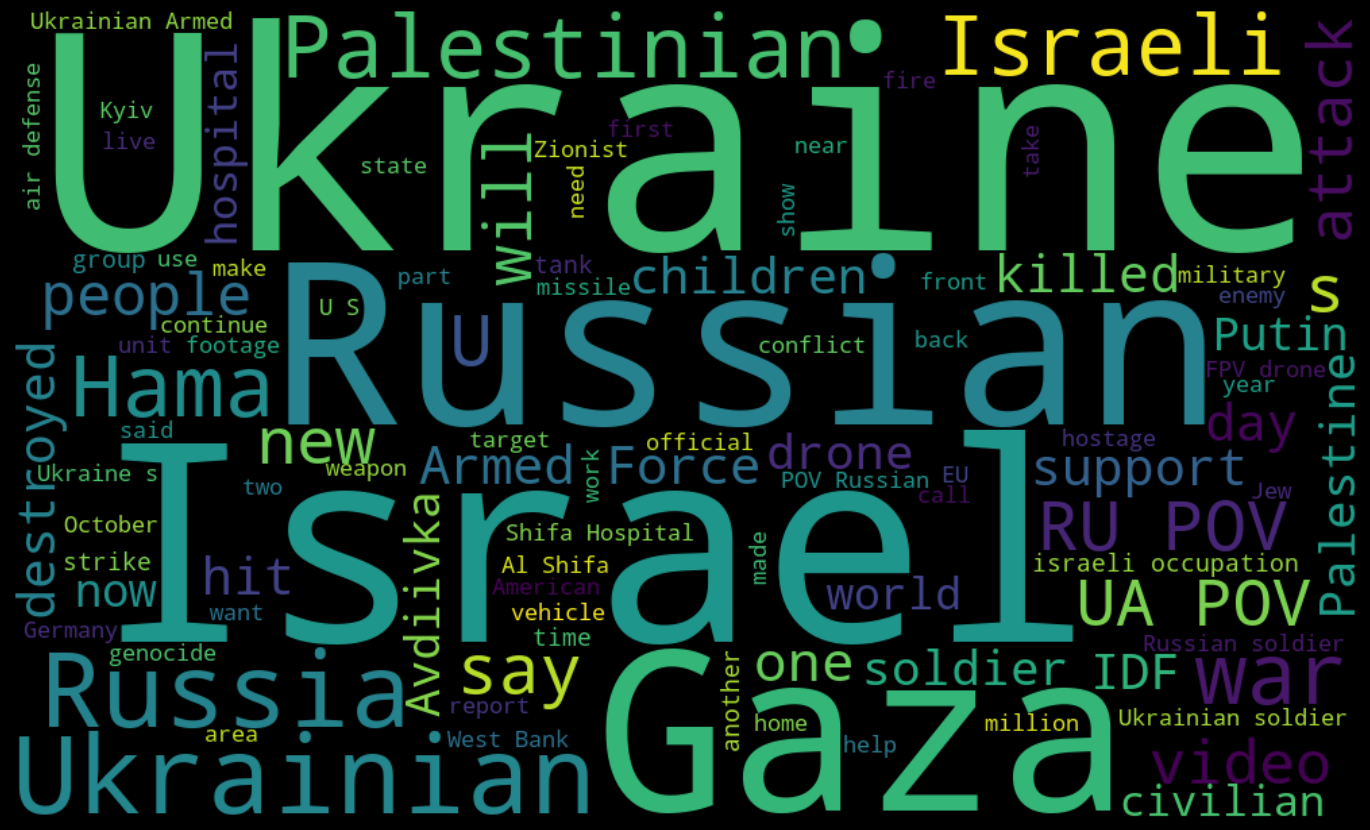

In [38]:
text = ' '.join( [twts for twts in df['title']] ) #To join all tweet
 # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600, 
 max_words = 100,
 stopwords = stopwords,
 background_color='black').generate(text)
# Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');